# DATA UNDERSTANDING

Firstly, we will use the dataframe found with the course material, data collision in Seattle City.
https://www.coursera.org/learn/applied-data-science-capstone/supplement/Nh5uS/downloading-example-dataset?ranMID=40328&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-0EQkbR5bKMC1m32WkPnVUg&siteID=TnL5HPStwNw-0EQkbR5bKMC1m32WkPnVUg&utm_content=10&utm_medium=partners&utm_source=linkshare&utm_campaign=TnL5HPStwNw

In [13]:
import pandas as pd 
df=pd.read_csv('Data-Collisions.csv')
df

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


Our target will be the severity code, it takes two values 1 or 2, it's the measure of the severity of an accident.

In [14]:
df["SEVERITYCODE"].value_counts(dropna=False)

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Let's see what these values refers to

In [15]:
df["SEVERITYDESC"].value_counts(dropna=False)

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

The data frame is an original one, so we have to extract our dataset. To doing so, there are many columns that we won't use. 
Besides the severity code we will keep WEATHER, which describes the weather at the time of crash, ROADCOND, which describes the condition of the road at the time of crash, LIGHTCOND, which describes the light conditions at the time of crash.ADDRTYPE, for collision address type.JUNCTIONTYPE,Category of junction at which collision took place.  

In [16]:
df_new=df[["ADDRTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND","SEVERITYCODE"]]
df_new

,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Intersection,At Intersection (intersection related),Overcast,Wet,Daylight,2
1,Block,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,1
2,Block,Mid-Block (not related to intersection),Overcast,Dry,Daylight,1
3,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight,1
4,Intersection,At Intersection (intersection related),Raining,Wet,Daylight,2
...,...,...,...,...,...,...
194668,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight,2
194669,Block,Mid-Block (not related to intersection),Raining,Wet,Daylight,1
194670,Intersection,At Intersection (intersection related),Clear,Dry,Daylight,2
194671,Intersection,At Intersection (intersection related),Clear,Dry,Dusk,2


Since the features ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND and LIGHTOND are categorical variables, we have to transform them into values or numerical variables when we have to start building our model of ML.

In [17]:
#we drop the Nan values and the unkown ones
import numpy as np
df_new.replace("Unknown", np.nan, inplace = True)
#drop the NaN values
df_new.dropna(subset=["ADDRTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"], axis=0, inplace=True)

df_new.reset_index(drop=True, inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
from sklearn import preprocessing

addtyp = preprocessing.LabelEncoder()
addtyp.fit(df_new['ADDRTYPE'])
df_new['ADDRTYPE']=addtyp.transform(df_new['ADDRTYPE'])

junfct = preprocessing.LabelEncoder()
junfct.fit(df_new['JUNCTIONTYPE'])
df_new['JUNCTIONTYPE']=junfct.transform(df_new['JUNCTIONTYPE'])

weath = preprocessing.LabelEncoder()
weath.fit(df_new['WEATHER'])
df_new['WEATHER']=weath.transform(df_new['WEATHER'])

RdCond = preprocessing.LabelEncoder()
RdCond.fit(df_new['ROADCOND'])
df_new['ROADCOND']=RdCond.transform(df_new['ROADCOND'])
 
LghCond = preprocessing.LabelEncoder()
LghCond.fit(df_new['LIGHTCOND'])
df_new['LIGHTCOND']=LghCond.transform(df_new['LIGHTCOND'])


    
df_new.head()





C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,2,1,4,7,5,2
1,1,4,6,7,2,1
2,1,4,4,0,5,1
3,1,4,1,0,5,1
4,2,1,6,7,5,2


In [19]:
X = df_new[["ADDRTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]].values
X[0:5]

array([[2, 1, 4, 7, 5],
       [1, 4, 6, 7, 2],
       [1, 4, 4, 0, 5],
       [1, 4, 1, 0, 5],
       [2, 1, 6, 7, 5]])

In [24]:
y=df_new["SEVERITYCODE"].values
y=y.astype('int32')
y[0:5]

array([2, 1, 1, 1, 2])

We  standardize the input features.

In [25]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.31486128, -1.19570014,  0.72295733,  1.61830505,  0.60367889],
       [-0.75348102,  0.97922713,  1.67850757,  1.61830505, -1.47923601],
       [-0.75348102,  0.97922713,  0.72295733, -0.62474414,  0.60367889],
       [-0.75348102,  0.97922713, -0.71036804, -0.62474414,  0.60367889],
       [ 1.31486128, -1.19570014,  1.67850757,  1.61830505,  0.60367889]])

Split the data into training data and testing data 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

Now we beging our modeling using the classification methods:

-K Nearest Neighbour (KNN)

-Decision Tree

-Logistic Regression

-Support vector machine 


# K NEAREST NEIGHBOUR (KNN)

To use the KNN method, we have first to find the best K 


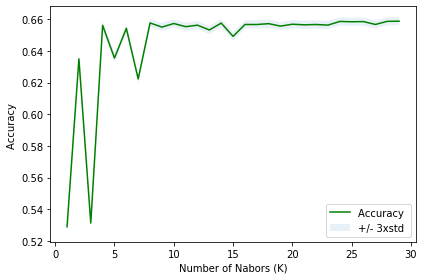

The best accuracy was with 0.6587036816394615 with k= 29


In [46]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
Ks = 30
#Calculate the accuracy for differznt values of KS

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [49]:
#so we perform our KNN model using K=28
k=29
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat=neigh.predict(X_test)
yhat[0:10]

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1])

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
#create an instance of the DecisionTreeClassifier called SeverityTree

SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SeverityTree.fit(X_train,y_train)
SeverityTree

yTree=SeverityTree.predict(X_test)
yTree[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
LR
yLR=LR.predict(X_test)
yLR[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Support Vector Machine

In [54]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
ySVM=clf.predict(X_test)
ySVM[0:5]

array([1, 1, 1, 1, 1])

# Evaluation of the methods

In [55]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# KNN 

In [56]:
# jaccard
jaccard_knn = jaccard_similarity_score(y_test, yhat)
print("KNN Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(y_test, yhat, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.6587036816394615
KNN F1-score:  0.572945729299168


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Decision Tree

In [57]:
# jaccard
jaccard_dt = jaccard_similarity_score(y_test, yTree)
print("DT Jaccard index: ", jaccard_dt)

# f1_score
f1_score_dt = f1_score(y_test, yTree, average='weighted')
print("DT F1-score: ", f1_score_dt)

DT Jaccard index:  0.6652567615870368
DT F1-score:  0.5315295143020385


# Logistic Regression

In [58]:
# jaccard
jaccard_lg = jaccard_similarity_score(y_test, yLR)
print("LR Jaccard index: ", jaccard_lg)

# f1_score
f1_score_lg = f1_score(y_test, yLR, average='weighted')
print("LR F1-score: ", f1_score_lg)
yLRproba=LR.predict_proba(X_test)
# logloss
logloss_lg = log_loss(y_test, yLRproba)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.6650482544977958
LR F1-score:  0.5320848928545494
LR log loss:  0.6222156659737387


# SVM

In [59]:
# jaccard
jaccard_svm = jaccard_similarity_score(y_test, ySVM)
print("SVM Jaccard index: ", jaccard_svm)

# f1_score
f1_score_svm = f1_score(y_test, ySVM, average='weighted')
print("SVM F1-score: ", f1_score_svm)

SVM Jaccard index:  0.6652567615870368
SVM F1-score:  0.5315295143020385


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
